## The cell below will get the data file, you only need to run it once 

(you do not need to do this if you have done it in the Interfacing_R notebook)

In [1]:
!rm sequence.index 2>/dev/null
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/sequence.index

--2015-02-18 13:10:37--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/sequence.index
           => ‘sequence.index’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.192.8
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.192.8|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp ... done.
==> SIZE sequence.index ... 67069489
==> PASV ... done.    ==> RETR sequence.index ... done.
Length: 67069489 (64M) (unauthoritative)

100%[======================================>] 67,069,489  9.31MB/s   in 7.2s   

2015-02-18 13:10:44 (8.89 MB/s) - ‘sequence.index’ saved [67069489]



In [2]:
import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2

%load_ext rpy2.ipython

In [3]:
seq_data = %R read.delim('sequence.index', header=TRUE, stringsAsFactors=FALSE)

In [4]:
as_integer = robjects.r('as.integer')
match = robjects.r.match
my_col = match('READ_COUNT', seq_data.colnames)[0] # Vector returned
seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])
my_col = match('BASE_COUNT', seq_data.colnames)[0] # Vector returned
seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])
%R -i seq_data
%R print(colnames(seq_data))
%R seq_data$CENTER_NAME <- toupper(seq_data$CENTER_NAME)

 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     


<StrVector - Python:0x7f4a40656f80 / R:0x960de30>
[str, str, str, ..., str, str, str]

In [5]:
%%R
seq_data <- seq_data[seq_data$WITHDRAWN==0, ]
seq_data <- seq_data[, c('STUDY_ID', 'STUDY_NAME', 'CENTER_NAME', 'SAMPLE_ID', 'SAMPLE_NAME', 'POPULATION', 'INSTRUMENT_PLATFORM', 'LIBRARY_LAYOUT', 'PAIRED_FASTQ', 'READ_COUNT', 'BASE_COUNT', 'ANALYSIS_GROUP')]

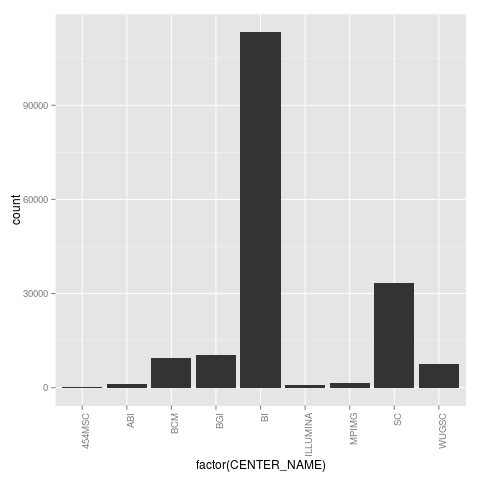

In [6]:
%%R
bar <- ggplot(seq_data) +  aes(factor(CENTER_NAME)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(bar)

In [7]:
%%R
seq_data$POPULATION <- as.factor(seq_data$POPULATION)
yri_ceu <- seq_data[seq_data$POPULATION %in% c("YRI", "CEU") & seq_data$BASE_COUNT < 2E9 & seq_data$READ_COUNT < 3E7, ]

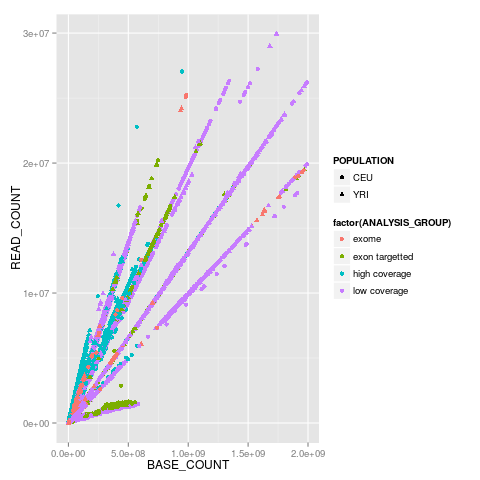

In [8]:
%%R
scatter <- ggplot(yri_ceu, aes(x=BASE_COUNT, y=READ_COUNT, col=factor(ANALYSIS_GROUP), shape=POPULATION)) + geom_point()
print(scatter)

Loading required package: grid


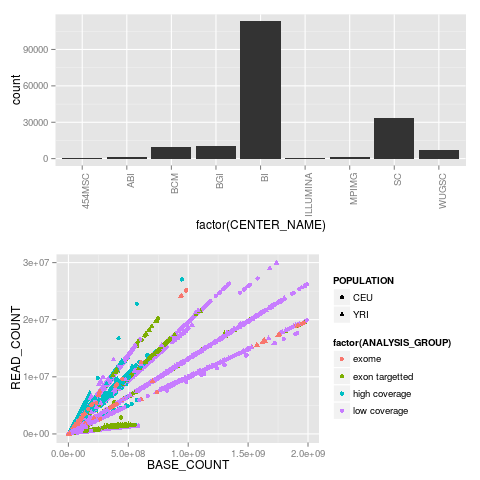

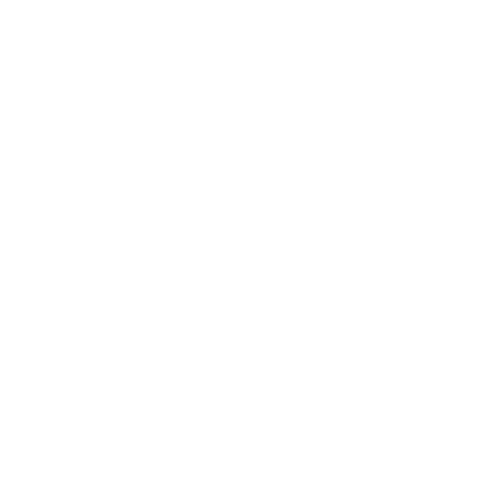

In [ ]:
%%R
library(gridExtra)
g <- arrangeGrob(bar, scatter, ncol=1)
g

In [ ]:
#%R ggsave('fig.pdf', g, dpi=600)
%R ggsave('fig.png', g, dpi=600)